## TBATS 

In [ ]:
!pip install tbats

## Import libraries and data

In [2]:
# import libraries 
import pandas as pd
import numpy as np 

In [122]:
# get the data 
date_format = "%d/%m/%Y"
dataset  = pd.read_csv(r"C:\Users\priyashukla\Documents\Study Notes\TimeSeriesModelling\daily-footfall.csv",
                   index_col = "WeekBeginning",
                   parse_dates=['WeekBeginning'], 
                   date_parser=lambda x: pd.datetime.strptime(x, date_format))
dataset.tail()

C:\Users\priyashukla\AppData\Local\anaconda3\envs\stan_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


,AveragePerDay
WeekBeginning,
2017-11-26,135
2017-12-03,127
2017-12-10,125
2017-12-17,114
2017-12-24,25


## Data Transformation

In [123]:
#index 
dataset = dataset.asfreq("W")
dataset.index

DatetimeIndex(['2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
               '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
               '2016-02-28', '2016-03-06',
               ...
               '2017-10-22', '2017-10-29', '2017-11-05', '2017-11-12',
               '2017-11-19', '2017-11-26', '2017-12-03', '2017-12-10',
               '2017-12-17', '2017-12-24'],
              dtype='datetime64[ns]', name='WeekBeginning', length=104, freq='W-SUN')

In [117]:
dataset.tail()

,AveragePerDay
WeekBeginning,
2017-11-26,135.0
2017-12-03,127.0
2017-12-10,125.0
2017-12-17,114.0
2017-12-24,25.0


## Visualization

<AxesSubplot:xlabel='WeekBeginning'>

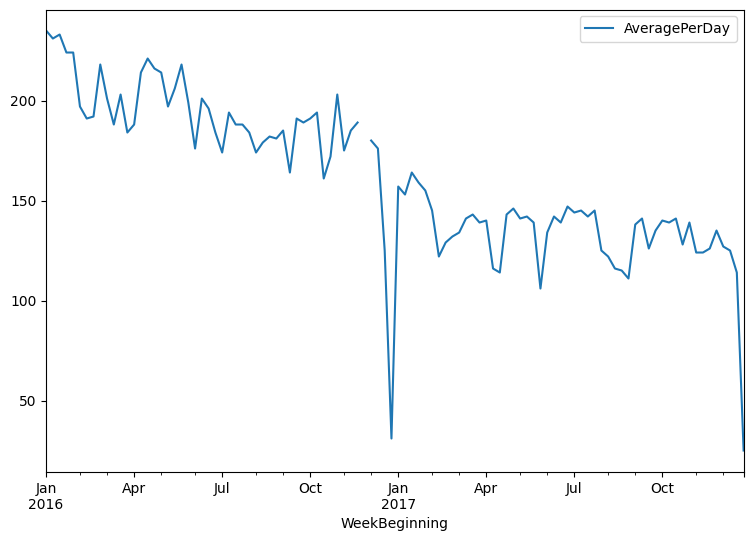

In [124]:
#visualization 
dataset.plot(figsize = (9,6), legend = True)

<AxesSubplot:xlabel='WeekBeginning'>

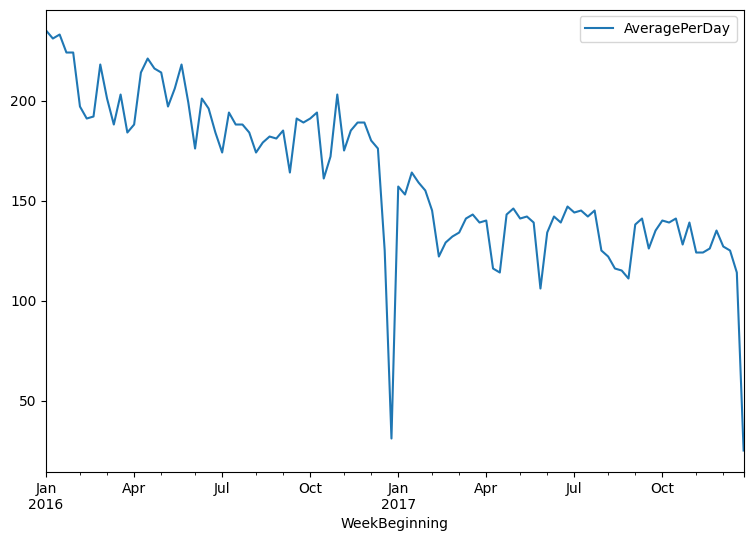

In [125]:
# fill NA
dataset = dataset.fillna(method = 'ffill')
#visualization 
dataset.plot(figsize = (9,6), legend = True)

## Training and Test Set

In [130]:
test_weeks = 5 #weeks
training_set = dataset.iloc[:-test_weeks,:]
test_set = dataset.iloc[-test_weeks:,:]
training_set.tail()

,AveragePerDay
WeekBeginning,
2017-10-22,128.0
2017-10-29,139.0
2017-11-05,124.0
2017-11-12,124.0
2017-11-19,126.0


# TBATS Model

In [16]:
#libraries 
from tbats import TBATS

In [131]:
#tbats model
model = TBATS(seasonal_periods = [52]).fit(training_set.AveragePerDay)

In [132]:
#predictions
predictions_tbats = pd.Series(model.forecast(steps = len(test_set))).rename("TBATS")
predictions_tbats.index = test_set.index
predictions_tbats.head()

WeekBeginning
2017-11-26    132.278004
2017-12-03    143.432138
2017-12-10    124.521807
2017-12-17     52.660443
2017-12-24     26.879344
Freq: W-SUN, Name: TBATS, dtype: float64

<AxesSubplot:xlabel='WeekBeginning'>

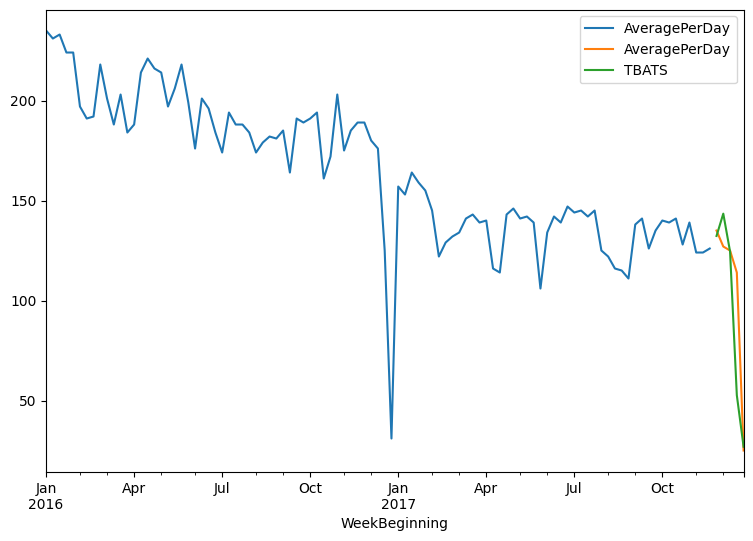

In [141]:
#visualization 
training_set['AveragePerDay']['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set['AveragePerDay'].plot(legend = True)
predictions_tbats.plot(legend = True)

## Model Assessment 

In [136]:
#MAE and RMSE 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
print(round(mean_absolute_error(test_set['AveragePerDay'], predictions_tbats),0))
print(round(np.sqrt(mean_squared_error(test_set['AveragePerDay'], predictions_tbats)),0))

17.0
28.0


In [137]:
#MAPE function
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['AveragePerDay'], predictions_tbats)

15.332309146218561

## Export Forecasts

In [139]:
predictions_tbats.to_csv(r'C:\Users\priyashukla\Documents\Study Notes\TimeSeriesModelling\prediction_export\predictions_tbats_retail_footfall.csv', index = True)